# Regression Algorithm in Machine Learning

### Regression is all about taking lots of data and plot graph or space of the data and then we build lines to seprate diffrent types of data throgh line or place... so the whole thing is to draw a lineor curve in case of 2D data and then we can predict future values or can do classification thing too...

### So there are 2 types of Regression 
### 1. Linear regression -- we can draw simple straight line in this case to seprate or predict values
### 2. logistic regression -- here we have more than one independent variables that determine outcome.

### Here first we discuss Linear Regression and develop a program which will predict stock value of any company

## Importing libraries

In [64]:
import sklearn
import quandl, datetime, math
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

### We will use googl stock data in order to predict next future value of stock using linear regression

In [56]:
df=quandl.get('WIKI/GOOGL')

### syle we use for ploting graph uning matplotlib

In [57]:
style.use('ggplot')

## Refining of usefull data

In [58]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Close']*100.0
df['PCT_Change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

df=df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]


## Forcasting data

In [59]:
forecast_col='Adj. Close'
df.fillna(-99999, inplace=True) #gettin rid of null data

forecast_out = int(math.ceil(0.005*len(df)))

df['label']=df[forecast_col].shift(-forecast_out)

## lets train the model and find accuracy

In [60]:
x=np.array(df.drop(['label'],1))
x=preprocessing.scale(x)
x=x[:-forecast_out]
x_lately=x[-forecast_out:]

df.dropna(inplace=True)
y=np.array(df['label'])

X_train, X_test, Y_train, Y_test= cross_validation.train_test_split(x, y, test_size=0.2)


### finding accuracy as per LinearRegression algo

In [61]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)
accuracy=clf.score(X_test, Y_test)
print(accuracy)

0.9870798084534094


### finding accuracy as per Support vector Regression

In [27]:
clf = svm.SVR()
clf.fit(X_train, Y_train)
accuracy=clf.score(X_test, Y_test)
print(accuracy)

0.8417856519182547


#### opps here in SVR we have accuracy about 84 %. Mean while LinearRegression Algorithm is far more better then SVR, so run that Again so that Values will be taken from LinearRegreation in further code for greater accuracy 

## lets do forcast thing and draw up graph

In [69]:
forecast_set=clf.predict(x_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast']=np.nan

last_date=df.iloc[-1].name
last_unix= last_date.timestamp()
one_day= 86400
next_unix= last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)]+ [i]


[1076.08296982 1090.60812442 1065.11957709 1012.67898246 1049.87159684
 1064.83990405 1065.02083267 1082.39076648 1101.30921698 1106.43088869
 1113.66430798 1123.74291711 1120.90213272 1138.92947655 1155.0527666
 1128.11132502 1114.48265773 1080.27636783] 0.9870798084534094 18


### lets map whole data on graph

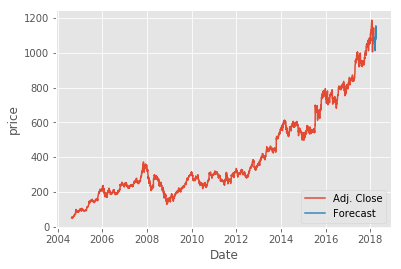

In [73]:
plt.plot(df['Adj. Close'])
plt.plot(df['Forecast'])
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

### now we have graph of future prediction with >98 % accuracy which is really great. Means we are predictting values of stock in next 30 days with >98 % accuracy.